<a href="https://colab.research.google.com/github/mrudula-2405/Bus-Management-System/blob/main/multivariate_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multivariate Linear Regression: Part-1**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

**Step 1: Create Dataset**

Dataset with multiple input feature

In [ ]:
# Create Dictionary containing the dataset
# 'Study_Hours' and 'Sleep_Hours' are input features
# 'Score' is the target (dependent) variable

data = {
    'Study_Hours' : [1,2,3,4,5,6,7,8],
    'Sleep_Hours' : [6,6,7,7,8,8,9,9],
    'Score' : [35,40,50,55,65,70,78,85]
}

In [ ]:
# Convert the dictionary dataset into a Pandas DataFrame for easy data handling and analysis

df = pd.DataFrame(data)

In [ ]:
df.shape

(8, 3)

In [ ]:
df.head()

,Study_Hours,Sleep_Hours,Score
0,1,6,35
1,2,6,40
2,3,7,50
3,4,7,55
4,5,8,65


In [ ]:
df.info

<bound method DataFrame.info of    Study_Hours  Sleep_Hours  Score
0            1            6     35
1            2            6     40
2            3            7     50
3            4            7     55
4            5            8     65
5            6            8     70
6            7            9     78
7            8            9     85>

In [ ]:
df.describe()

,Study_Hours,Sleep_Hours,Score
count,8.00000,8.000000,8.000000
mean,4.50000,7.500000,59.750000
std,2.44949,1.195229,17.822538
min,1.00000,6.000000,35.000000
25%,2.75000,6.750000,47.500000
50%,4.50000,7.500000,60.000000
75%,6.25000,8.250000,72.000000
max,8.00000,9.000000,85.000000


**Step 2 : Define Variable**

In [ ]:
x = df[['Study_Hours', 'Sleep_Hours']]
y = df['Score']

**Step 3 : Train-Test Split**

In [ ]:
# Split the dataset into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Step 4: Train Model**

In [ ]:
# Create an object of the Linear Regression Model
model = LinearRegression()

# Train the model using the training data
model.fit(x_train, y_train)

LinearRegression()

**Step 5: Model Parameter**

In [ ]:
# Display the coefficents (weights) for each independent variable

print("Coefficients: ", model.coef_)

Coefficients:  [5.71428571 3.14285714]


In [ ]:
# Display the intercept (bias) of the regression model

print("Intercept: ",model.intercept_)

Intercept:  10.571428571428534


**Step 6: Training & Evaluation**

In [ ]:
# Predict the output values for the test dataset using the trained model
y_pred = model.predict(x_train)

In [ ]:
# Calculate and display the Mean Squared Error (MSE)

print('MSE : ',mean_squared_error(y_train, y_pred))

MSE :  0.2857142857142904


In [ ]:
# Calculate and display the R^2 Score

print('R^2 Score : ',r2_score(y_train, y_pred))

R^2 Score :  0.9989994441356309


**Step 7: Predict for New Input**

In [ ]:
new_input = [[12,5]]
print('Predicted Score:', model.predict(new_input)[0])

Predicted Score: 94.85714285714283


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**By taking input values from the user**

In [ ]:
study_hours = float(input("Enter the number of study hours: "))
sleep_hours = float(input("Enter the number of sleep hours: "))

user_input = [[study_hours, sleep_hours]]
predicted_score = print('Predicted Score : ',model.predict(user_input)[0])

Enter the number of study hours: 12
Enter the number of sleep hours: 5
Predicted Score :  94.85714285714283


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Problem Statement**

Design and implement a Multivariate Linear Regression Model to predict the tip amount given by a customer based on multiple factors such as total bill amount and family size

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Step 1 : Load TIPs Dataset

In [ ]:
tips = sns.load_dataset('tips')

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
tips.shape

(244, 7)

In [ ]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Step 2 : Select Features and Target

In [ ]:
X = tips[['total_bill', 'size']]
y = tips['tip']

Step 3 : Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create an object of the Linear Regression Model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

LinearRegression()

Step 5: Model Parameter

In [ ]:
print("Coefficients: ", model.coef_)

Coefficients:  [0.09088117 0.26501754]


In [ ]:
print('Intercept :',model.intercept_)

Intercept : 0.5681370921350064


Step 6: Training & Evaluation

In [ ]:
y_pred = model.predict(X_train)

In [ ]:
print('MSE : ',mean_squared_error(y_train, y_pred))

MSE :  1.1141024702219378


In [ ]:
print('R^2 Score : ',r2_score(y_train, y_pred))

R^2 Score :  0.4516422761023764


Step 7 : Predict New Value

In [ ]:
print('Predicted Tip:', model.predict([[20, 5]])[0])

Predicted Tip: 3.7108481673744067


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
total_bill = float(input("Enter the total bill amount: "))
family_size = int(input("Enter the number of people: "))

user_input = [[total_bill, family_size]]
predicted_tip = print('Predicted Tip :', model.predict(user_input)[0])

Enter the total bill amount: 2000
Enter the number of people: 4
Predicted Tip : 183.3905428971956


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


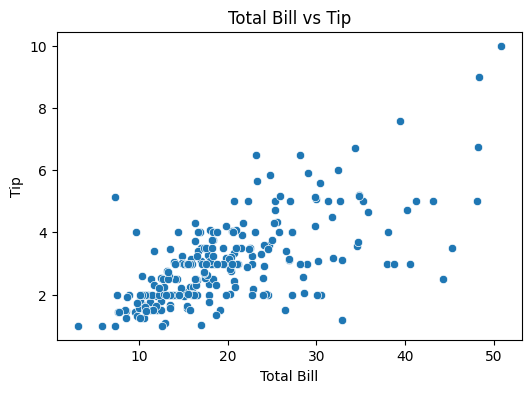

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset('tips')

plt.figure(figsize=(6,4))
sns.scatterplot(x='total_bill', y='tip', data=tips)

plt.title("Total Bill vs Tip")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.show()

Add Regression Line

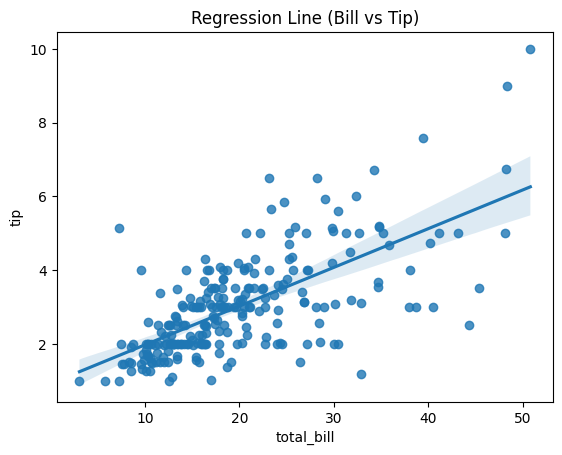

In [ ]:
sns.regplot(x='total_bill', y='tip', data=tips)

plt.title("Regression Line (Bill vs Tip)")
plt.show()

Color by Family Size

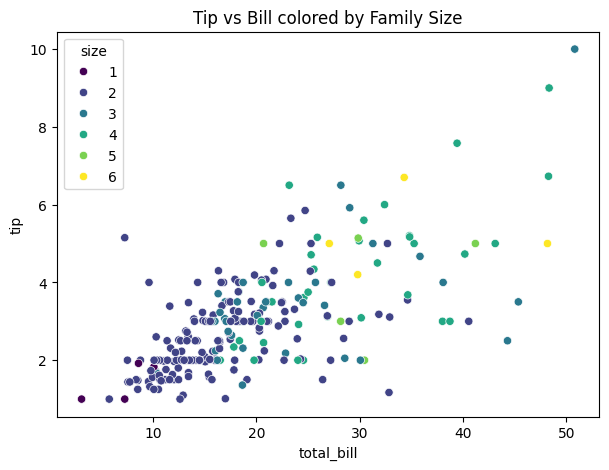

In [ ]:
plt.figure(figsize=(7,5))

sns.scatterplot(
    x='total_bill',
    y='tip',
    hue='size',
    palette='viridis',
    data=tips
)

plt.title("Tip vs Bill colored by Family Size")
plt.show()
